<a href="https://colab.research.google.com/github/chingyunghuang/titanic-analysis/blob/main/%E5%B0%88%E6%A1%88%E5%AF%A6%E4%BD%9C%EF%BC%8301_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded=files.upload()
import io
train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
################ First Version Model #######################

In [ ]:
# preprocessing data

# one hot encoding for Pclass and Sex 
train_data1 = pd.concat([train_data, pd.get_dummies(train_data["Pclass"],prefix='Class')], axis=1)
train_data1 = pd.concat([train_data1, pd.get_dummies(train_data1["Sex"])], axis=1)

# fill na
train_data1[["Embarked"]] = train_data1[["Embarked"]].fillna('S')
train_data1[["Age"]] = train_data1[["Age"]].fillna(train_data1[["Age"]].mean())

# one hot encoding for Embarked
train_data1 = pd.concat([train_data1, pd.get_dummies(train_data1["Embarked"],prefix='Embarked')], axis=1)

train_data1.head()
train_data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Class_1      891 non-null    uint8  
 13  Class_2      891 non-null    uint8  
 14  Class_3      891 non-null    uint8  
 15  female       891 non-null    uint8  
 16  male         891 non-null    uint8  
 17  Embarked_C   891 non-null    uint8  
 18  Embarked_Q   891 non-null    uint8  
 19  Embarked

Fare          0.257307
Embarked_S   -0.149683
Embarked_C    0.168240
Class_2       0.093349
Class_1       0.285904
Age          -0.069809
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
male         -0.543351
Class_3      -0.322308
female        0.543351
Survived      1.000000
Name: Survived, dtype: float64

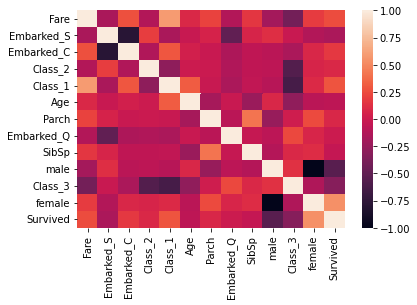

In [ ]:
columns_X1 = list(set(train_data1.columns) - {'Pclass','PassengerId','Sex','Name','Ticket','Cabin','Embarked'})

# plot the heatmap
corr=train_data1[columns_X1].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
#進一步觀察其他「數值欄位/類別欄位」的屬性與「是否生存欄位」之關係程度，找出關係大的欄位。
train_data1[columns_X1].corr()['Survived']


In [ ]:
columns_X = list(set(train_data1.columns) - {'Survived','Pclass','PassengerId','Sex','Name','Ticket','Cabin','Embarked'})
columns_y = ['Survived']

train_X = train_data1[columns_X]
train_y = train_data1[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores

array([0.77653631, 0.79213483, 0.78651685, 0.76966292, 0.83707865])

In [ ]:
########## Second Version Model ###############

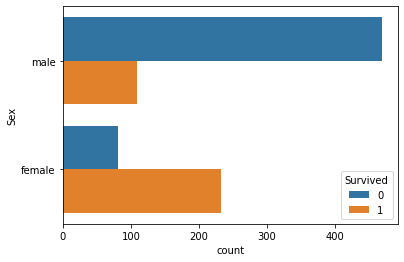

In [ ]:
train_data1['Sex']
sns.countplot(y=train_data1['Sex'],hue=train_data1.Survived)

<Figure size 432x288 with 0 Axes>

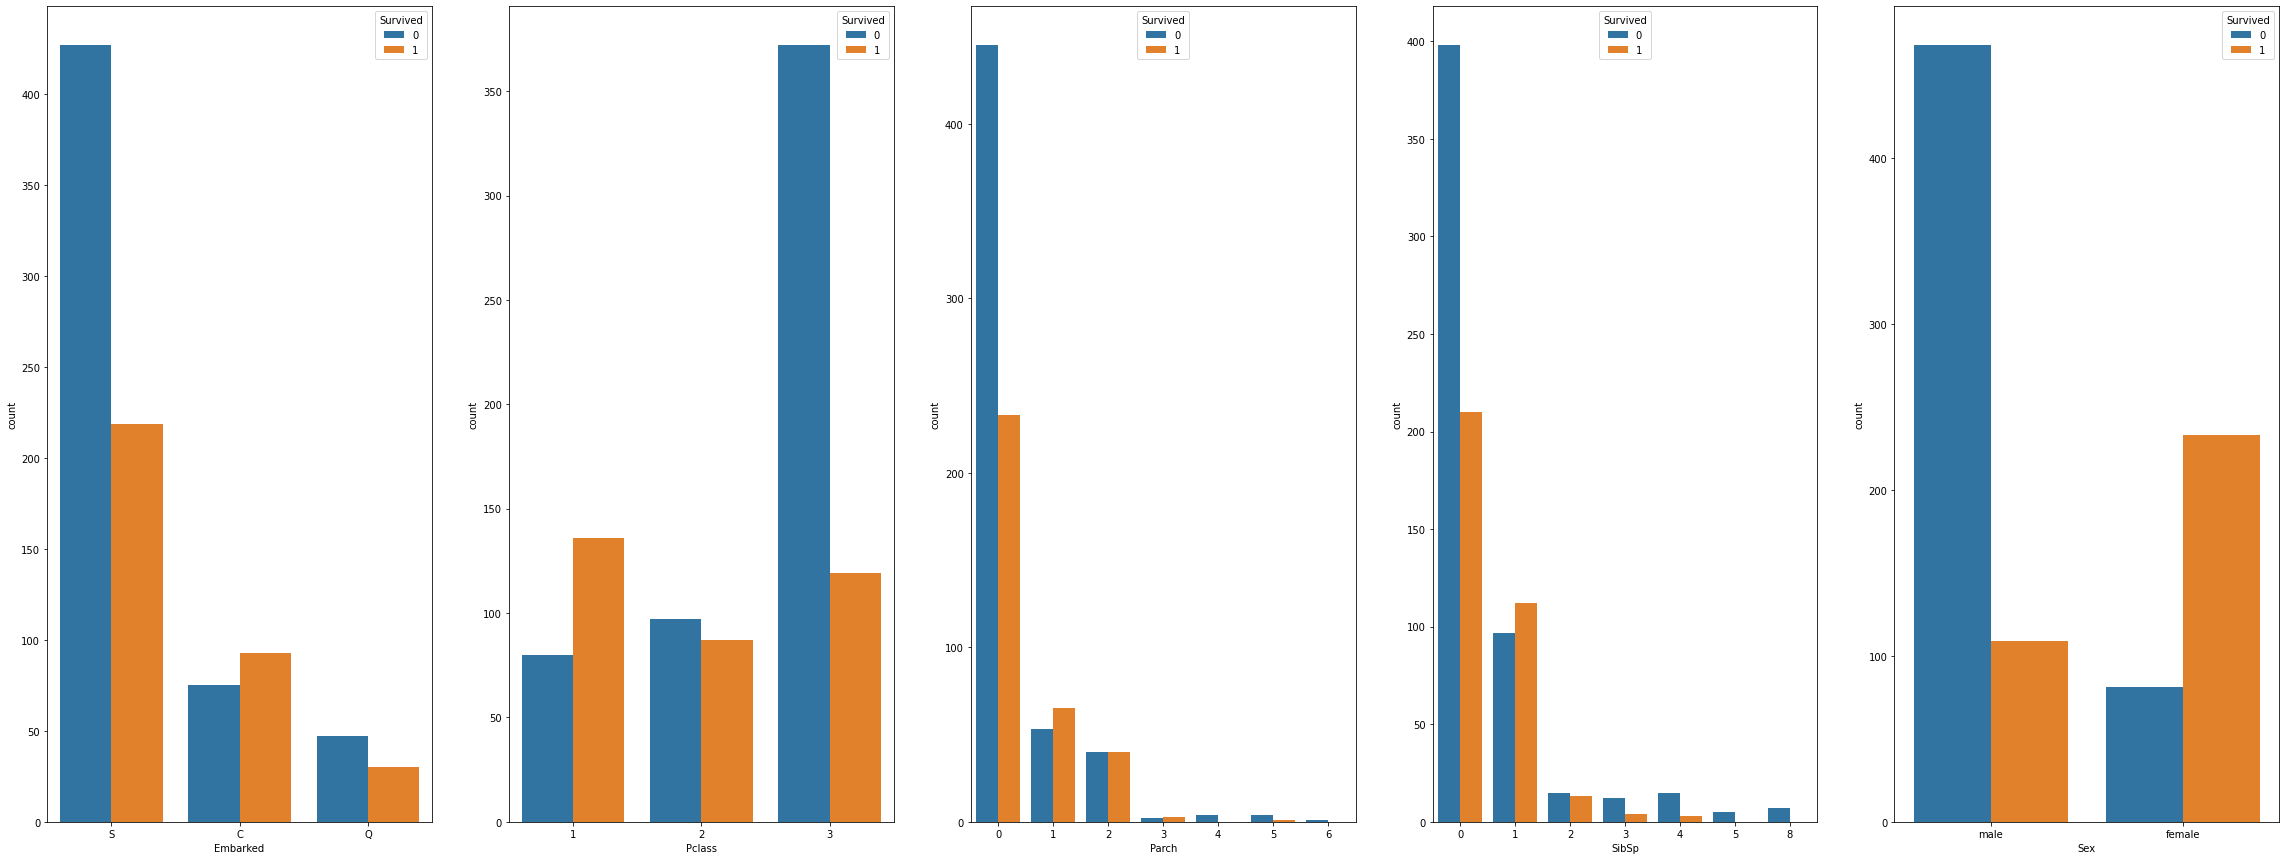

In [ ]:
# optimize the model

# 延續昨天的觀察，欄位中與「是否生存欄位」找出關係比較大的欄位有哪些？你是如何定義「關係大」的呢？


  # Method: Correlation
  # 看到 是female與有存活有比較高的正相關 ，因此female這個feature 與「是否生存欄位」關係較大

columns_X1 = list(set(train_data1.columns) - {'Pclass','PassengerId','Sex','Name','Ticket','Cabin','Embarked'})
train_data1[columns_X1].corr()['Survived']

  # Method : Visualization
    # People who..
        # embarked from C
        # in Class 1
        # have 1 parents / children aboard the Titanic 
        # have 1 siblings / spouses aboard the Titanic
        # are female
    # have higher chance to survive

column_list=['Sex','Embarked','Pclass','Parch','SibSp']

plt.figure() 

fig, axs = plt.subplots(1,5,figsize=(40,15))
for i, col in enumerate( train_data1[column_list] ) :  
  sns.countplot(x=train_data1[col],hue=train_data1.Survived,ax=axs[i-1])   

plt.show()


# 請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？
  # Cabin 缺失值多且不重要，可以移除, Name 和 PassengerId 對於預測survived 與否沒有幫助，所以可以去除




In [5]:
## 3. 請你針對「有缺失值」的幾個欄位，嘗試比較不同的處理策略（例如用常數、中位數、平均數填補）。


train_data2=train_data
# fill the missing value of'Embarked'with the mode value
train_data2[["Embarked"]] = train_data2[["Embarked"]].fillna('S')
# fill the missing value of'age'with median age
train_data2[["Age"]] = train_data2[["Age"]].fillna(train_data2[["Age"]].mean())



In [6]:
# 4. 請你針對「非數值型」的幾個欄位，嘗試比較不同的處理策略（例如用 LabelEncoder 或 OneHotEncoder）。

# one hot encoding for Pclass and Sex 

train_data2 = pd.concat([train_data2, pd.get_dummies(train_data2["Pclass"],prefix='Class')], axis=1)
train_data2 = pd.concat([train_data2, pd.get_dummies(train_data2["Sex"])], axis=1)
train_data2 = pd.concat([train_data2, pd.get_dummies(train_data2["Embarked"],prefix='Embarked')], axis=1)
train_data2.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Class_1', 'Class_2',
       'Class_3', 'female', 'male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [7]:
# add column : family_member , Fare_class

train_data2['family_member']=train_data2['SibSp']+train_data2['Parch']+1
label=['Cheap','Mid-cheap','Middle','Luxurious']
train_data2['fare_class']=pd.qcut(train_data2['Fare'],4,labels=label)
  # turn fareclass to dummy
train_data2 = pd.concat([train_data2, pd.get_dummies(train_data2["fare_class"],prefix='Fare_')], axis=1)
train_data2.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Class_1', 'Class_2',
       'Class_3', 'female', 'male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'family_member', 'fare_class', 'Fare__Cheap', 'Fare__Mid-cheap',
       'Fare__Middle', 'Fare__Luxurious'],
      dtype='object')

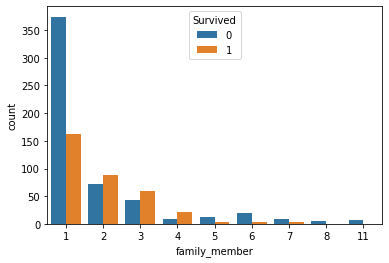

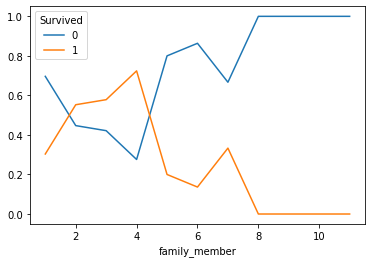

In [23]:
# visulaize the relationship between family member and survived 
# Finding: People who had 2~4 family members had a higher chance to survive

sns.countplot(x=train_data2['family_member'],hue=train_data2.Survived)

#visualize the distribution of survived and non survived per "# of family_member"
familySize_data=train_data2.groupby(['family_member','Survived']).count()['PassengerId']
unstack_familySize_data=familySize_data.unstack('Survived')
familySize_dist=unstack_familySize_data.div(unstack_familySize_data.sum(1),axis=0).fillna(0)
familySize_dist.plot()

In [27]:
# transform "family member" from numerical to categorical
def familySizeTransform(s):
  if s>=2 and s<5:
    return 3
  elif s==1 or (s>=5 and s<8):
    return 2
  else:
    return 1
# map the family member to category
train_data2['FamilySizeEncoding']=train_data2['family_member'].map(familySizeTransform)
#train_data2[['family_member','FamilySizeEncoding']][:10]

In [28]:
columns_X2 = list(set(train_data2.columns) - {'Survived','Pclass','PassengerId','Sex','Name','Ticket','Cabin','Embarked','fare_class','family_member'})
columns_y2 = ['Survived']

train_X2 = train_data2[columns_X2]
train_y2= train_data2[columns_y2]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X2, train_y2.values.ravel(),cv=5,scoring='accuracy')
scores

array([0.7877095 , 0.79775281, 0.78651685, 0.78651685, 0.82022472])

In [32]:
# Finding: After optimizing the model, we can find the following attributes that have relatively high correlation with "Survived" attribute
# Attribute such as ....
  # sex (male/female)
  # Pclass (3 & 1)
  # FamilySizeEncoding
  # Fare_Luxurious
  # Fare_cheap

abs(train_data2.corr()['Survived']).sort_values(ascending=False)

Survived              1.000000
male                  0.543351
female                0.543351
Pclass                0.338481
Class_3               0.322308
FamilySizeEncoding    0.289087
Class_1               0.285904
Fare                  0.257307
Fare__Luxurious       0.233638
Fare__Cheap           0.221610
Embarked_C            0.168240
Embarked_S            0.149683
Fare__Mid-cheap       0.095648
Class_2               0.093349
Fare__Middle          0.084239
Parch                 0.081629
Age                   0.069809
SibSp                 0.035322
family_member         0.016639
PassengerId           0.005007
Embarked_Q            0.003650
Name: Survived, dtype: float64